# About

SHiP track pattern recognition is in this notebook.

In [18]:
from IPython.parallel import Client

clients = Client()
print clients.ids

[0, 1, 2, 3, 4, 5, 6, 7]


# Data

In [30]:
%%px
import os, sys
sys.path.append('Github/copy/ship_tracks_recognition/functions')

In [31]:
%%px
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt
import cPickle as pickle

In [38]:
%matplotlib inline
import cPickle as pickle
import pandas
import numpy
import matplotlib.pyplot as plt
import os, sys
sys.path.append('../functions')

In [35]:
all_mctracks = pandas.read_csv('Data/MCTrack.csv', delimiter=',')
all_velo_points = pandas.read_csv('Data/vetoPoint.csv', delimiter=',')
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index

# Get reconstructible events

In [ ]:
from utils import get_reconstractible_events
#reconstructible_events = get_reconstractible_events(range(0, 2500), all_hits, all_mctracks, all_velo_points)

# file_pickle = open('./Data/reco_tracks_for_pattern_recognition.pkl', 'wb')
# pickle.dump(reconstructible_events, file_pickle)
# file_pickle.close()

file_pickle = open('./Data/reco_tracks_for_pattern_recognition.pkl', 'rb')
reconstructible_events_pkl = pickle.load(file_pickle)
file_pickle.close()

reconstructible_events = reconstructible_events_pkl

In [ ]:
# reconstructible_events_valid = get_reconstractible_events(range(2500, 5000), all_hits, all_mctracks, all_velo_points)

# file_pickle = open('./Data/reco_tracks_for_pattern_recognition_valid.pkl', 'wb')
# pickle.dump(reconstructible_events_valid, file_pickle)
# file_pickle.close()

file_pickle = open('./Data/reco_tracks_for_pattern_recognition_valid.pkl', 'rb')
reconstructible_events_valid_pkl = pickle.load(file_pickle)
file_pickle.close()

reconstructible_events_valid = reconstructible_events_valid_pkl

In [ ]:
numpy.array(reconstructible_events.keys())

# Stations 1&2

### Tracks Parameters Distributions

In [43]:
%%time

from utils import get_tracks_params, get_tracks_params

params_zy_valid_12 = get_tracks_params(reconstructible_events_valid, [1, 2], 'zy', all_hits)
ks_zy_valid_12, dks_zy_valid_12, bs_zy_valid_12, dbs_zy_valid_12, k_errs_zy_valid_12, b_errs_zy_valid_12 = \
                                                                        get_params_distributions(params_zy_valid_12)
    
    
params_zx_valid_12 = get_tracks_params(reconstructible_events_valid, [1, 2], 'zx', all_hits)
ks_zx_valid_12, dks_zx_valid_12, bs_zx_valid_12, dbs_zx_valid_12, k_errs_zx_valid_12, b_errs_zx_valid_12 = \
                                                                        get_params_distributions(params_zx_valid_12)

CPU times: user 2.39 s, sys: 46.6 ms, total: 2.44 s
Wall time: 2.51 s


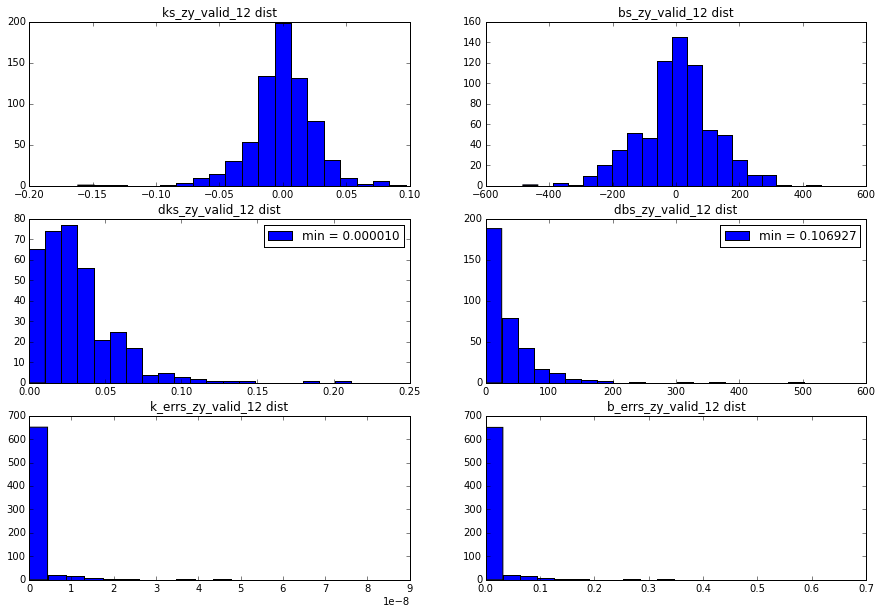

In [44]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.hist(ks_zy_valid_12, bins=20)
plt.title('ks_zy_valid_12 dist')

plt.subplot(3, 2, 2)
plt.hist(bs_zy_valid_12, bins=20)
plt.title('bs_zy_valid_12 dist')

plt.subplot(3, 2, 3)
plt.hist(dks_zy_valid_12, bins=20, label='min = %f' % dks_zy_valid_12.min())
plt.title('dks_zy_valid_12 dist')
plt.legend(loc='best')

plt.subplot(3, 2, 4)
plt.hist(dbs_zy_valid_12, bins=20, label='min = %f' % dbs_zy_valid_12.min())
plt.title('dbs_zy_valid_12 dist')
plt.legend(loc='best')

plt.subplot(3, 2, 5)
plt.hist(k_errs_zy_valid_12, bins=20)
plt.title('k_errs_zy_valid_12 dist')

plt.subplot(3, 2, 6)
plt.hist(b_errs_zy_valid_12, bins=20)
plt.title('b_errs_zy_valid_12 dist')

plt.show()

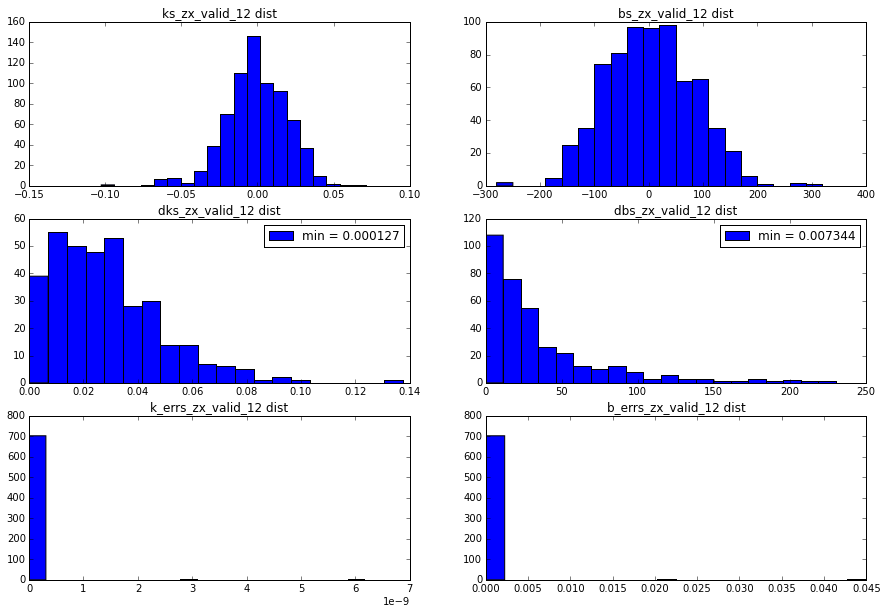

In [45]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.hist(ks_zx_valid_12, bins=20)
plt.title('ks_zx_valid_12 dist')

plt.subplot(3, 2, 2)
plt.hist(bs_zx_valid_12, bins=20)
plt.title('bs_zx_valid_12 dist')

plt.subplot(3, 2, 3)
plt.hist(dks_zx_valid_12, bins=20, label='min = %f' % dks_zx_valid_12.min())
plt.title('dks_zx_valid_12 dist')
plt.legend(loc='best')

plt.subplot(3, 2, 4)
plt.hist(dbs_zx_valid_12, bins=20, label='min = %f' % dbs_zx_valid_12.min())
plt.title('dbs_zx_valid_12 dist')
plt.legend(loc='best')

plt.subplot(3, 2, 5)
plt.hist(k_errs_zx_valid_12, bins=20)
plt.title('k_errs_zx_valid_12 dist')

plt.subplot(3, 2, 6)
plt.hist(b_errs_zx_valid_12, bins=20)
plt.title('b_errs_zx_valid_12 dist')

plt.show()

### Set Hough Transformation Parameters

In [53]:
%%px
from hough import HoughLinear
from Y_views import *
import UV_views

from utils import get_zy_candidates, get_zx_hits
from utils import get_hough_params

In [48]:
k_params_zy, b_params_zy = get_hough_params(ks_zy_valid_12, 
                                            dks_zy_valid_12, 
                                            bs_zy_valid_12, 
                                            dbs_zy_valid_12, 
                                            k_errs_zy_valid_12, 
                                            b_errs_zy_valid_12)

k_params_zx, b_params_zx = get_hough_params(ks_zx_valid_12, 
                                            dks_zx_valid_12, 
                                            bs_zx_valid_12, 
                                            dbs_zx_valid_12, 
                                            k_errs_zx_valid_12, 
                                            b_errs_zx_valid_12)

b_params_zy[2] *= 2
k_params_zy[2] *= 2
print k_params_zy, b_params_zy
print k_params_zx, b_params_zx

[-0.16159300620541525, 0.097042760477385567, 2956] [-482.63273982319117, 458.12715582148348, 2956]
[-0.10261849124920781, 0.071351075485449597, 1168] [-279.93077437762093, 319.15015378651975, 1168]


### Tracks Reconstruction

In [49]:
test = [27, 1756, 1557,   39, 1629,  134, 2263, 1352, 1848, 2280,  381,  917, 1439, 2470,  970, 2040,  102]

In [108]:
from utils import run_stations, merge_dicts

In [68]:
%%time
from hough import HoughLinear

view = clients.load_balanced_view()
event_ids = reconstructible_events.keys()
res = view.map(run_stations, event_ids, [all_hits]*len(event_ids),
               [k_params_zy]*len(event_ids), 
               [b_params_zy]*len(event_ids), 
               [k_params_zx]*len(event_ids), 
               [b_params_zx]*len(event_ids), 
               ['12']*len(event_ids))

reco_events12 = merge_dicts(res.get())

CPU times: user 18.2 s, sys: 42.2 s, total: 1min
Wall time: 2min 37s


In [72]:
# file_pickle = open('./Data/reco_events12_model_4.pkl', 'wb')
# pickle.dump(reco_events12, file_pickle)
# file_pickle.close()

file_pickle = open('./Data/reco_events12_model_4.pkl', 'rb')
reco_events12_pkl = pickle.load(file_pickle)
file_pickle.close()

reco_events12 = reco_events12_pkl

### Check

In [75]:
a = []
for i in reco_events12.keys():
    ids = [0,0]
    for num, track in enumerate(reco_events12[i][3].values()):
        unique, count = numpy.unique(all_hits.loc[track].TrackID.values, return_counts=True)
        ids[num] = unique[count == count.max()][0]
    if ids[0] == ids[1] or ids[0] == 0 or ids[1] == 0:
        print i, ids
        a.append(i)
numpy.array(a)

2040 [2.0, 2.0]


array([2040])

# Stations 3&4

### Tracks Parameters Distributions

In [109]:
%%time
params_zy_valid_34 = get_tracks_params(reconstructible_events_valid, [3, 4], 'zy')
ks_zy_valid_34, dks_zy_valid_34, bs_zy_valid_34, dbs_zy_valid_34, k_errs_zy_valid_34, b_errs_zy_valid_34 = \
                                                                        get_params_distributions(params_zy_valid_34)
    
    
params_zx_valid_34 = get_tracks_params(reconstructible_events_valid, [3, 4], 'zx')
ks_zx_valid_34, dks_zx_valid_34, bs_zx_valid_34, dbs_zx_valid_34, k_errs_zx_valid_34, b_errs_zx_valid_34 = \
                                                                        get_params_distributions(params_zx_valid_34)

CPU times: user 2.19 s, sys: 55.2 ms, total: 2.25 s
Wall time: 2.36 s


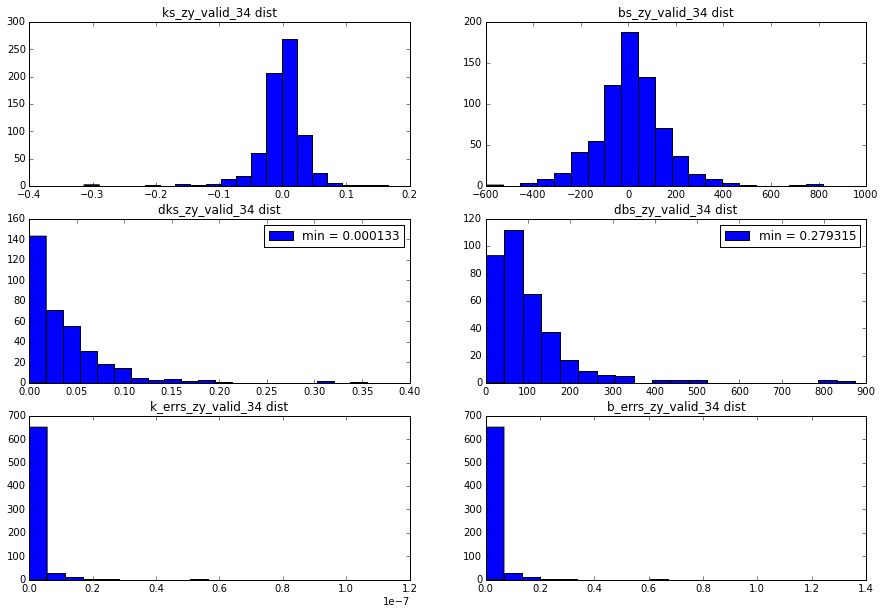

In [110]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.hist(ks_zy_valid_34, bins=20)
plt.title('ks_zy_valid_34 dist')

plt.subplot(3, 2, 2)
plt.hist(bs_zy_valid_34, bins=20)
plt.title('bs_zy_valid_34 dist')

plt.subplot(3, 2, 3)
plt.hist(dks_zy_valid_34, bins=20, label='min = %f' % dks_zy_valid_34.min())
plt.title('dks_zy_valid_34 dist')
plt.legend(loc='best')

plt.subplot(3, 2, 4)
plt.hist(dbs_zy_valid_34, bins=20, label='min = %f' % dbs_zy_valid_34.min())
plt.title('dbs_zy_valid_34 dist')
plt.legend(loc='best')

plt.subplot(3, 2, 5)
plt.hist(k_errs_zy_valid_34, bins=20)
plt.title('k_errs_zy_valid_34 dist')

plt.subplot(3, 2, 6)
plt.hist(b_errs_zy_valid_34, bins=20)
plt.title('b_errs_zy_valid_34 dist')

plt.show()

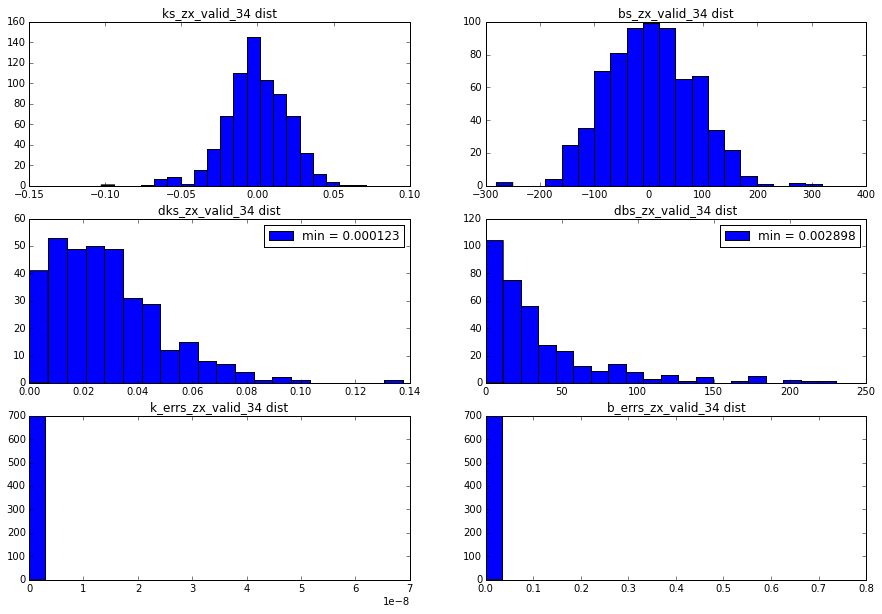

In [111]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.hist(ks_zx_valid_34, bins=20)
plt.title('ks_zx_valid_34 dist')

plt.subplot(3, 2, 2)
plt.hist(bs_zx_valid_34, bins=20)
plt.title('bs_zx_valid_34 dist')

plt.subplot(3, 2, 3)
plt.hist(dks_zx_valid_34, bins=20, label='min = %f' % dks_zx_valid_34.min())
plt.title('dks_zx_valid_34 dist')
plt.legend(loc='best')

plt.subplot(3, 2, 4)
plt.hist(dbs_zx_valid_34, bins=20, label='min = %f' % dbs_zx_valid_34.min())
plt.title('dbs_zx_valid_34 dist')
plt.legend(loc='best')

plt.subplot(3, 2, 5)
plt.hist(k_errs_zx_valid_34, bins=20)
plt.title('k_errs_zx_valid_34 dist')

plt.subplot(3, 2, 6)
plt.hist(b_errs_zx_valid_34, bins=20)
plt.title('b_errs_zx_valid_34 dist')

plt.show()

### Set Hough Transformation Parameters

In [112]:
k_params_zy, b_params_zy = get_hough_params(ks_zy_valid_34, 
                                            dks_zy_valid_34, 
                                            bs_zy_valid_34, 
                                            dbs_zy_valid_34, 
                                            k_errs_zy_valid_34, 
                                            b_errs_zy_valid_34)

k_params_zx, b_params_zx = get_hough_params(ks_zx_valid_34, 
                                            dks_zx_valid_34, 
                                            bs_zx_valid_34, 
                                            dbs_zx_valid_34, 
                                            k_errs_zx_valid_34, 
                                            b_errs_zx_valid_34)

b_params_zy[2] *= 20
k_params_zy[2] *= 20
print k_params_zy, b_params_zy
print k_params_zx, b_params_zx

[-0.31337692687857516, 0.16567745770845432, 1820] [-595.57352761270852, 817.30249368258194, 1820]
[-0.10257267567173788, 0.071073994931276696, 1189] [-280.16326517399324, 318.15418068055982, 1189]


### Tracks Reconstruction

In [113]:
%%time
from hough import HoughLinear

view = clients.load_balanced_view()
event_ids = reconstructible_events.keys()
res = view.map(run_stations, event_ids, [all_hits]*len(event_ids),
               [k_params_zy]*len(event_ids), 
               [b_params_zy]*len(event_ids), 
               [k_params_zx]*len(event_ids), 
               [b_params_zx]*len(event_ids), 
               ['34']*len(event_ids))

reco_events34 = merge_dicts(res.get())

CPU times: user 17.2 s, sys: 35.2 s, total: 52.4 s
Wall time: 2min 48s
CPU times: user 17.2 s, sys: 35.2 s, total: 52.4 s
Wall time: 2min 48s


In [115]:
# file_pickle = open('./Data/reco_events34_model_4.pkl', 'wb')
# pickle.dump(reco_events34, file_pickle)
# file_pickle.close()

file_pickle = open('./Data/reco_events34_model_3.pkl', 'rb')
reco_events34_pkl = pickle.load(file_pickle)
file_pickle.close()

reco_events34 = reco_events34_pkl

### Check

In [295]:
a = []
for i in reco_events34.keys():
    ids = [0,0]
    for num, track in enumerate(reco_events34[i][3].values()):
        unique, count = numpy.unique(all_hits.loc[track].TrackID.values, return_counts=True)
        ids[num] = unique[count == count.max()][0]
    if ids[0] == ids[1] or ids[0] == 0 or ids[1] == 0:
        print i, ids, numpy.unique(all_hits.loc[track].TrackID.values, return_counts=True)
        a.append(i)
numpy.array(a)

143 [2.0, 2.0] (array([ 2.]), array([15]))
1722 [2.0, 2.0] (array([ 2.]), array([14]))
270 [2.0, 2.0] (array([ 2.]), array([8]))
2040 [2.0, 2.0] (array([ 2.]), array([15]))
1528 [2.0, 2.0] (array([ 2.]), array([13]))


array([ 143, 1722,  270, 2040, 1528])

# Combination tracks

### Data Preparation

In [172]:
from MatchTracks import get_dx_dy, get_true_label, get_matching_data, get_new_matched_tracks

In [173]:
data = get_matching_data(reco_events12, reco_events34, all_hits)

In [214]:
data['dk_xz'] = data['k_xz_34'].values - data['k_xz_12'].values
data['db_xz'] = data['b_xz_34'].values - data['b_xz_12'].values
data['dk_yz'] = data['k_yz_34'].values - data['k_yz_12'].values
data['db_yz'] = data['b_yz_34'].values - data['b_yz_12'].values

In [215]:
X = data[[u'dx', u'dy', 
          u'k_xz_12', u'b_xz_12', 
          u'k_yz_12',u'b_yz_12', 
          u'k_xz_34', u'b_xz_34', 
          u'k_yz_34', u'b_yz_34', 
          'dk_xz', 'db_xz', 
          'dk_yz', 'db_yz']].values
y = data[['label']].values.reshape(-1)

### Train Classifier

In [216]:
from rep.metaml import FoldingClassifier
from rep.estimators import XGBoostClassifier


from rep.estimators import XGBoostClassifier
xgb_base = XGBoostClassifier(n_estimators=1000, colsample=0.7, eta=0.01, nthreads=3, 
                             subsample=0.5, max_depth=8)
folding = FoldingClassifier(xgb_base, n_folds=10, random_state=11)
%time folding.fit(X, y)

CPU times: user 28.1 s, sys: 15.4 s, total: 43.5 s
Wall time: 29.2 s


FoldingClassifier(base_estimator=XGBoostClassifier(base_score=0.5, colsample=0.7, eta=0.01, features=None,
         gamma=None, max_depth=8, min_child_weight=1.0, missing=-999.0,
         n_estimators=1000, nthreads=3, num_feature=None, random_state=0,
         scale_pos_weight=1.0, subsample=0.5, verbose=0),
         features=['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13'],
         n_folds=10, parallel_profile=None, random_state=11)

### Prediction and Quality

In [217]:
y_proba = folding.predict_proba(X)[:, 1]
y_predict = folding.predict(X)

from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_proba)

KFold prediction using folds column
KFold prediction using folds column


0.99985166689328664

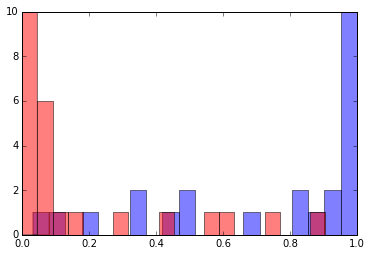

In [218]:
plt.hist(y_proba[y==1], label='1', color='b', bins=20, alpha=0.5)
plt.hist(y_proba[y==0], label='0', color='r', bins=20, alpha=0.5)
plt.ylim(0,10)
plt.show()

### Tracks Combination

In [380]:
match_tracks = {}
for event_id in reconstructible_events.keys():
    
    ids = data[data.EventID.values == event_id][['track_id_12', 'track_id_34']].values
    probas = y_proba[data.EventID.values == event_id]
    
    match_tracks[event_id] = ids[probas.argsort()[::-1], :][:2, :]
    #match_tracks[event_id] = ids[probas > 0.5, :]
    if len(match_tracks[event_id]) < 2:
        print event_id

In [282]:
charge_dict, pinv_dict, dist_y, dist_x = get_new_matched_tracks(reco_events12, reco_events34, match_tracks)

true_charge_dict, true_pdg_dict, true_pinv_dict = get_true_match(reco_events12, reco_events34, match_tracks, all_hits)

# Efficiency

### Stations 1&2

In [283]:
from efficiency import efficiency_per_track

eff_y, eff_stereo, eff_station = efficiency_per_track(reconstructible_events.keys(), 
                                            all_hits, 
                                            reco_events12)

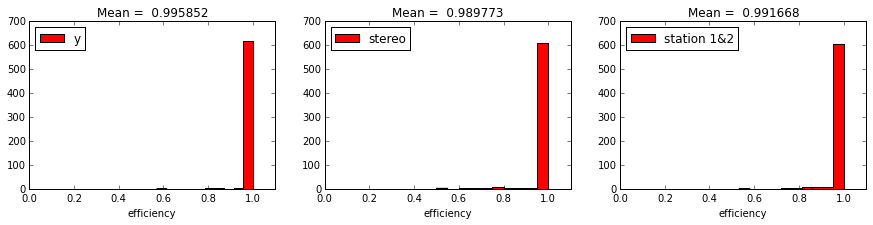

In [284]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

### Stations 3&4

In [285]:
from efficiency import efficiency_per_track

eff_y, eff_stereo, eff_station = efficiency_per_track(reconstructible_events.keys(), 
                                            all_hits, 
                                            reco_events34)

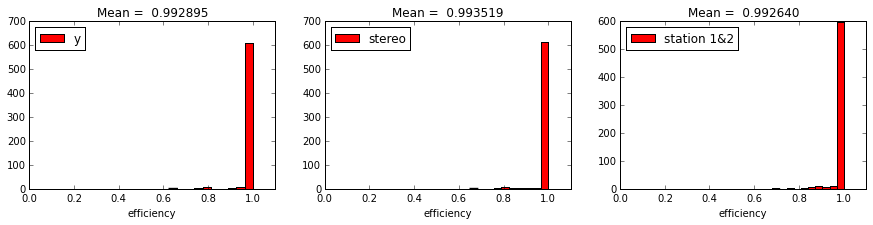

In [286]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

# Efficiency per event

Total efficiency per event is  97.4842767296  %


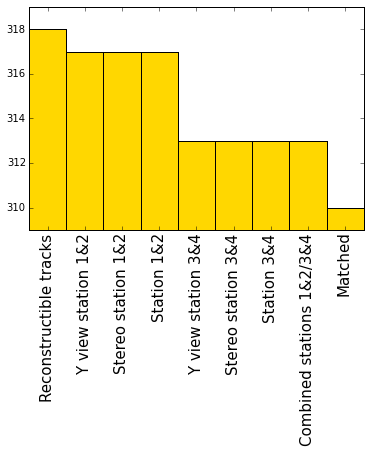

In [384]:
from efficiency import efficiency_per_event, view_check_reco_event

n_events, missed_events = efficiency_per_event(reconstructible_events, reco_events12, reco_events34, match_tracks, true_pdg_dict, all_hits)

n_events = numpy.array(n_events)

labels = ['Reconstructible tracks', 
          'Y view station 1&2', 
          'Stereo station 1&2', 
          'Station 1&2',
          'Y view station 3&4', 
          'Stereo station 3&4',
          'Station 3&4',
          'Combined stations 1&2/3&4',
          'Matched']

print 'Total efficiency per event is ', 1. * n_events[-1] / n_events[0] * 100., ' %'

x = range(len(labels))
#plt.figure(figsize=(15,5))
plt.bar(x, n_events, width=1., color='gold', align='center')
plt.xticks(x, labels, rotation=90, size=15)
plt.xlim(-0.5, 8.5)
plt.ylim(n_events.min() - 1., n_events.max() + 1.)
plt.show()

In [385]:
n_events

array([ 318.,  317.,  317.,  317.,  313.,  313.,  313.,  313.,  310.])

# Momentum

In [393]:
pinv_dict_clean = {}
true_pinv_dict_clean = {}
true_charge_dict_clean = {}

for key in pinv_dict.keys():
    
    if key not in missed_events:
        
        pinv_dict_clean[key] = pinv_dict[key]
        true_pinv_dict_clean[key] = true_pinv_dict[key]
        true_charge_dict_clean[key] = true_charge_dict[key]

y = b + kx
k, b =  0.000375822068946 -0.000622537891247
Cov matrix is 
[[  9.51433551e-08  -6.01875554e-08]
 [ -6.01875554e-08   2.36434273e-05]]


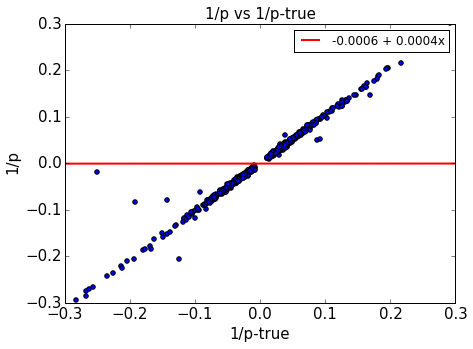

In [398]:
from MatchTracks import get_pinv_true_pinv
        
pinv, true_pinv = get_pinv_true_pinv(pinv_dict_clean, true_pinv_dict_clean, true_charge_dict_clean)
        

[k, b], cov = numpy.polyfit(true_pinv, pinv, 1, cov=True)
print 'y = b + kx'
print 'k, b = ', k, b
print 'Cov matrix is '
print cov

plt.figure(figsize=(7, 5))
plt.title('1/p vs 1/p-true', size=15)
plt.scatter(true_pinv, pinv)
x = numpy.array([-0.3, 0.3])
plt.plot(x, k * x + b, color='r', linewidth=2, label='%.4f + ' % b + '%.4fx' % k)
plt.legend(loc='best')
plt.ylabel('1/p', size=15)
plt.xlabel('1/p-true', size=15)
plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

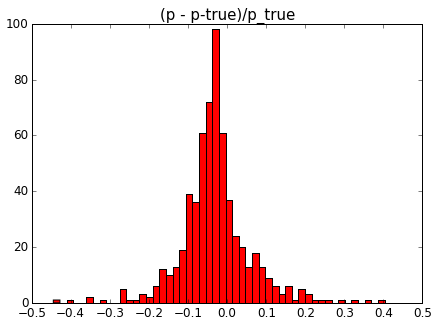

In [399]:
metric = true_pinv/pinv - 1

plt.figure(figsize=(7, 5))
plt.hist(metric[numpy.abs(metric) <= 0.5], bins=50)

plt.title('(p - p-true)/p_true', size=15)
plt.xticks(numpy.arange(-0.5, 0.51, 0.1), size=12)
plt.yticks(size=12)
plt.xlim(-0.5, 0.5)
plt.show()